# [Practical AI with Python and Reinforcement Learning](https://www.udemy.com/course/practical-ai-with-python-and-reinforcement-learning)

* Section 7 - ***Artificial Neural Network and TensorFlow Basics***
  * Regression



## Regression with two datasets

- fake_reg.csv
- kc_house_data.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ml-dataset/data/fake_reg.csv")

In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


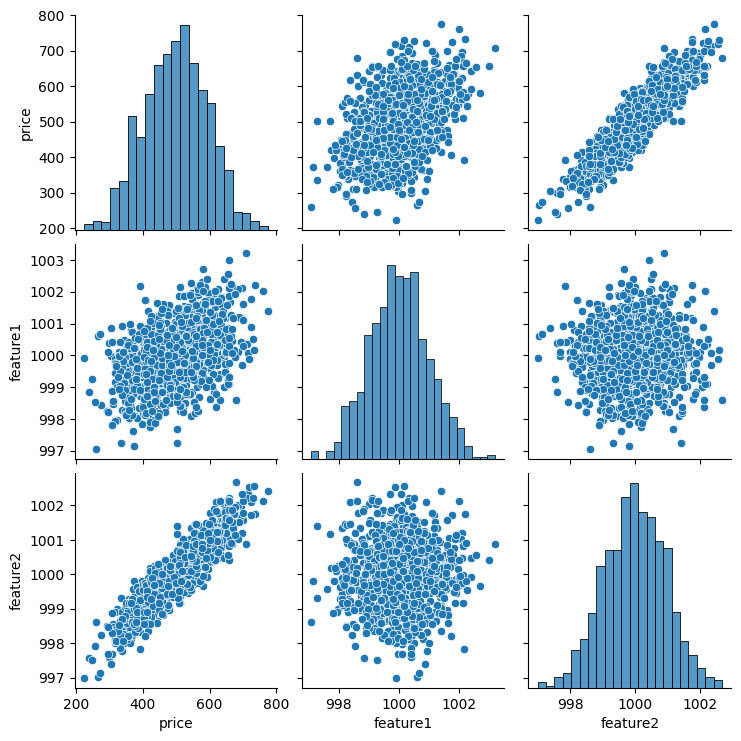

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[["feature1", "feature2"]].values
y = df["price"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [ ]:
y_train.shape, y_test.shape

((700,), (300,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
# fit on training set so test data don't leak on training data
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
keras.__version__

'2.15.0'

## Choosing an optimizer and loss


```
# For a binary classification problem
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# For a multi-class classification problem
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# For a mean squared error regression problem
model.compile(optimizer="rmsprop",
              loss="mse")
```

## Regression with Fake Data

In [ ]:
"""
# You can use the pattern below too:
model = Sequential([
    Dense(4, activation="relu"),
    Dense(2, activation="relu"),
    Dense(1)
])
"""
# I'll use the used on the course
model = Sequential()
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
# Last layer just one output, because we want to predict the price (continuous variable)
model.add(Dense(1))
model.compile(optimizer="rmsprop", loss="mse")

In [ ]:
model.fit(x=X_train, y=y_train, epochs=250, use_multiprocessing=True)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256581.6406
Epoch 2/250
22/22 [==============================] - 0s 4ms/step - loss: 256434.4219
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256283.6562
Epoch 4/250
22/22 [==============================] - 0s 4ms/step - loss: 256116.5469
Epoch 5/250
22/22 [==============================] - 0s 4ms/step - loss: 255933.0469
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 255729.5938
Epoch 7/250
22/22 [==============================] - 0s 4ms/step - loss: 255504.1406
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 255257.1719
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 254991.8594
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 254710.0156
Epoch 11/250
22/22 [==============================] - 0s 4ms/step - loss: 254407.2188
Epoch 12/250
22/22 [==============================] - 0s 6ms/st

## Model Evaluation

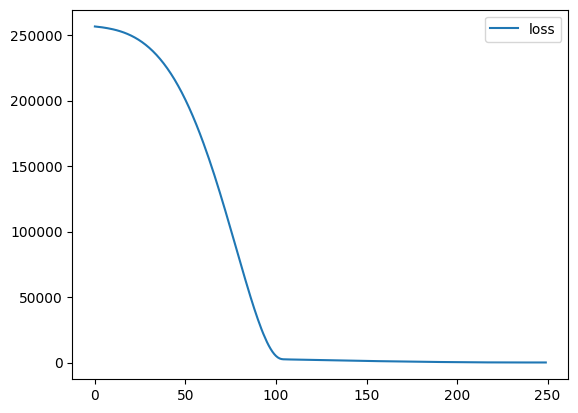

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

25.271713256835938

In [ ]:
model.evaluate(X_train, y_train, verbose=0)

24.112503051757812

In [ ]:
test_predictions = model.predict(X_test)
test_predictions.shape, y_test.shape

10/10 [==============================] - 0s 1ms/step


((300, 1), (300,))

In [ ]:
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.DataFrame({"Test True Y": y_test,
                        "Model Predictions": test_predictions})
pred_df

,Test True Y,Model Predictions
0,402.296319,405.915344
1,624.156198,623.055420
2,582.455066,591.701782
3,578.588606,572.243774
4,371.224104,367.899597
...,...,...
295,525.704657,529.246887
296,502.909473,516.149597
297,612.727910,609.185791
298,417.569725,417.304779


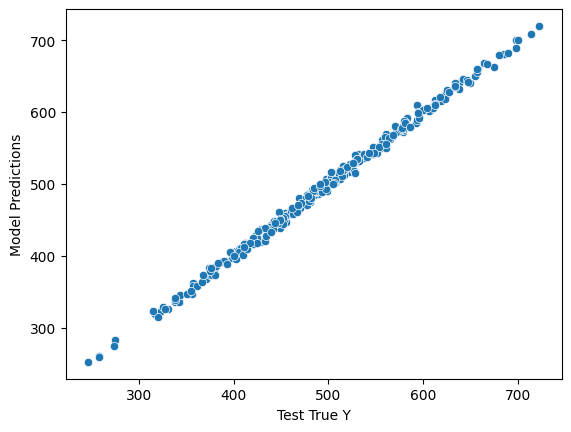

In [ ]:
sns.scatterplot(x="Test True Y", y="Model Predictions", data=pred_df)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(pred_df["Test True Y"], pred_df["Model Predictions"])

4.060708381482292

In [ ]:
mean_squared_error(pred_df["Test True Y"], pred_df["Model Predictions"])

25.27171892370467

In [ ]:
mean_squared_error(pred_df["Test True Y"], pred_df["Model Predictions"])**0.5

5.027098459718555

In [ ]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [ ]:
# Generating fake data just to see the prediction output
new_gem = [[998, 1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

1/1 [==============================] - 0s 21ms/step


array([[420.66724]], dtype=float32)

In [ ]:
from keras.models import load_model

model.save("my_gem_model.h5")
later_model = load_model("my_gem_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 43ms/step


array([[420.66724]], dtype=float32)

## Exploratory Data Analysis

### The Data - Regression study

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [30]:
df = pd.read_csv("/content/drive/MyDrive/ml-dataset/data/kc_house_data.csv")

In [31]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


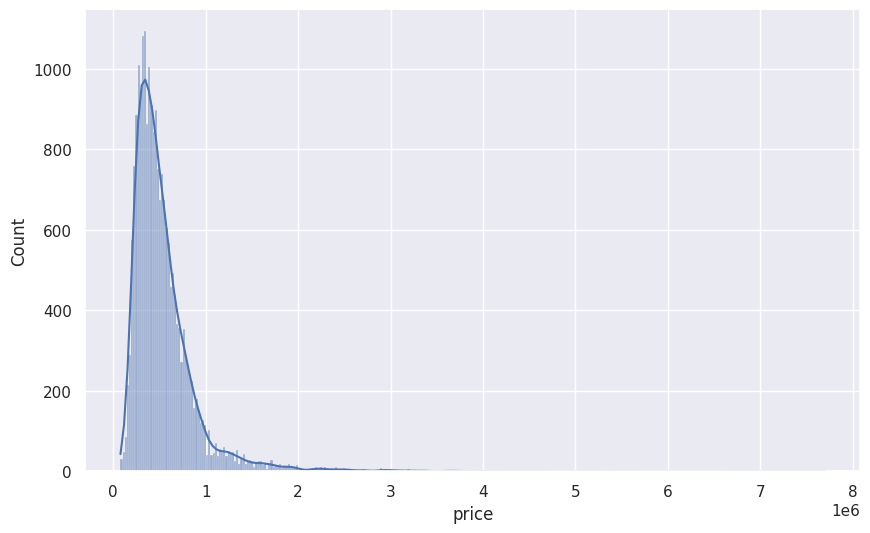

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="price", kde=True)
plt.show()

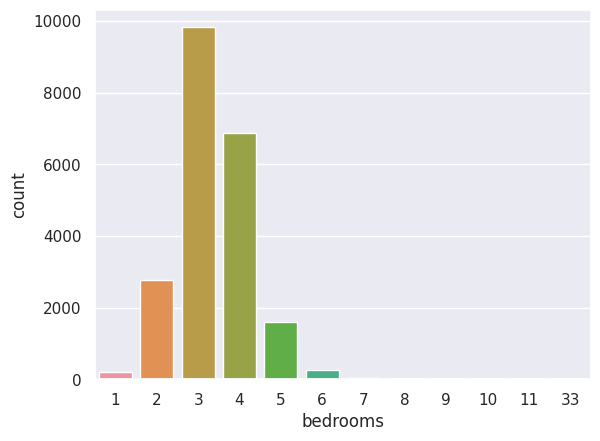

In [40]:
sns.countplot(data=df, x="bedrooms")
plt.show()

In [46]:
df.corr(numeric_only=True)["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

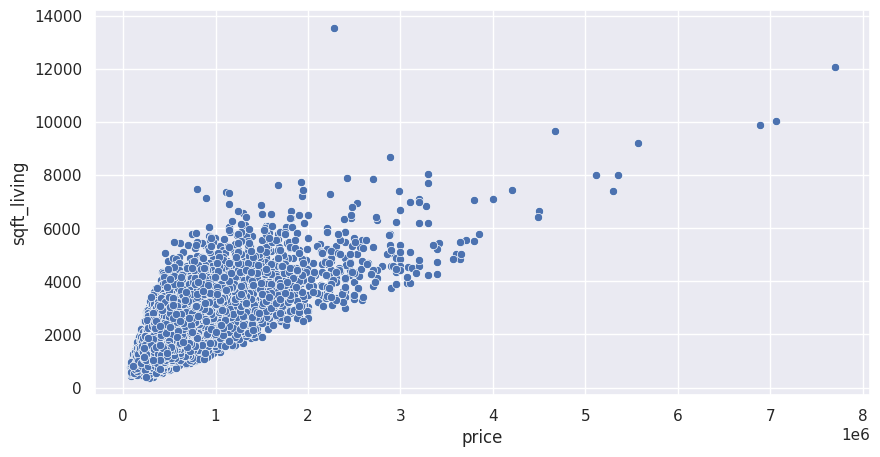

In [47]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="price", y="sqft_living")
plt.show()

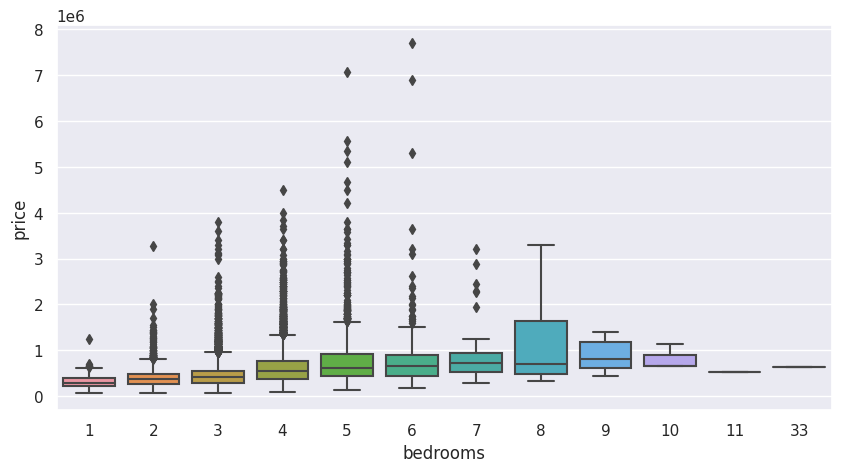

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="bedrooms", y="price")
plt.show()

In [51]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

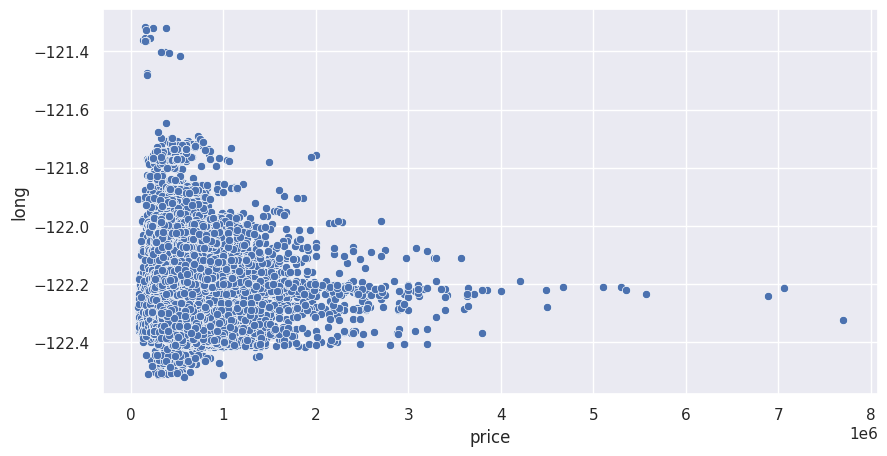

In [53]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="price", y="long")
plt.show()

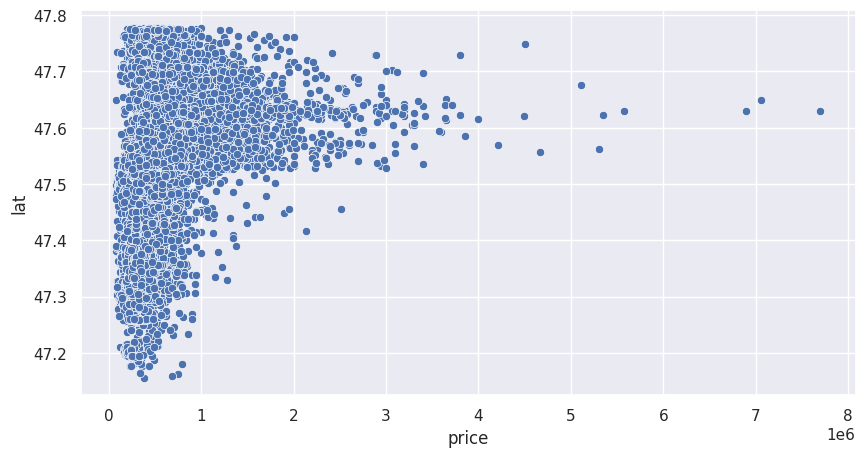

In [54]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="price", y="lat")
plt.show()

### You can compare the data below with King Count base map

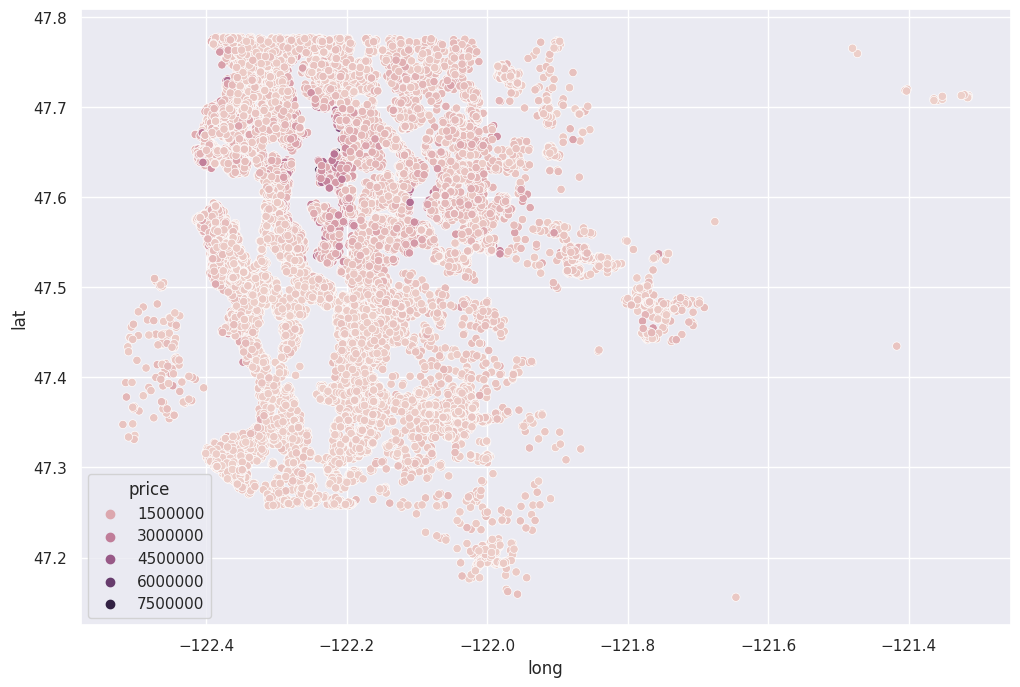

In [68]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="long", y="lat", hue="price")
plt.show()

In [58]:
df.sort_values("price", ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [60]:
# 1%
len(df)*0.01

215.97

In [65]:
# Discard the top 1% outliers
top_1_percent = int(round(len(df)*0.01, 1))
df_non_top_1_percent = df.sort_values("price", ascending=False).iloc[top_1_percent:]

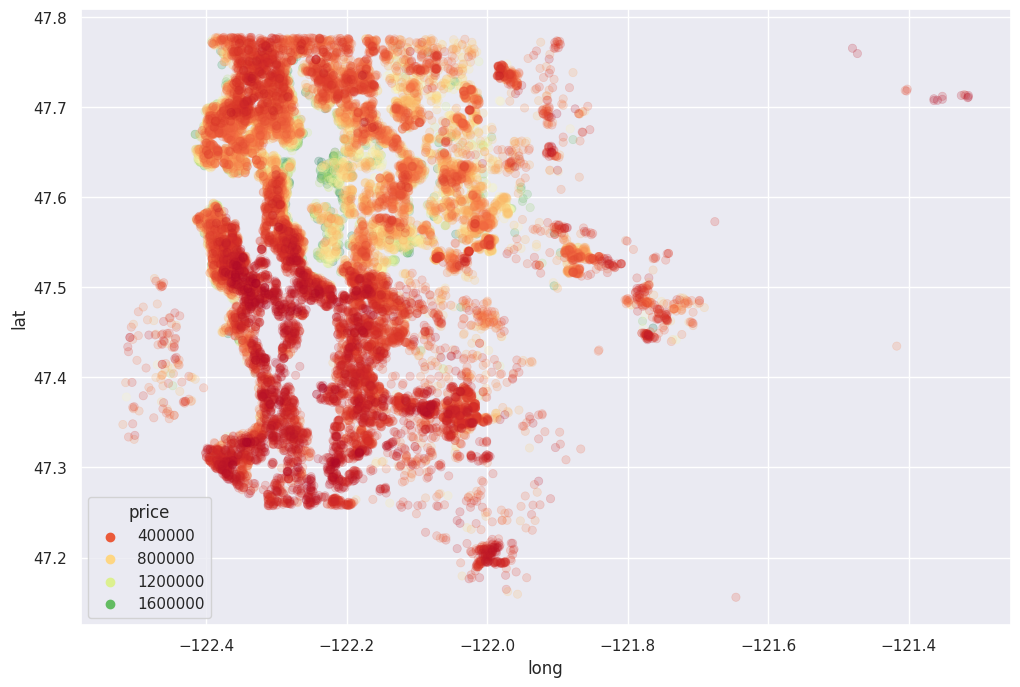

In [71]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_non_top_1_percent,
                x="long", y="lat",
                edgecolor=None, alpha=0.2,
                hue="price", palette="RdYlGn")
plt.show()

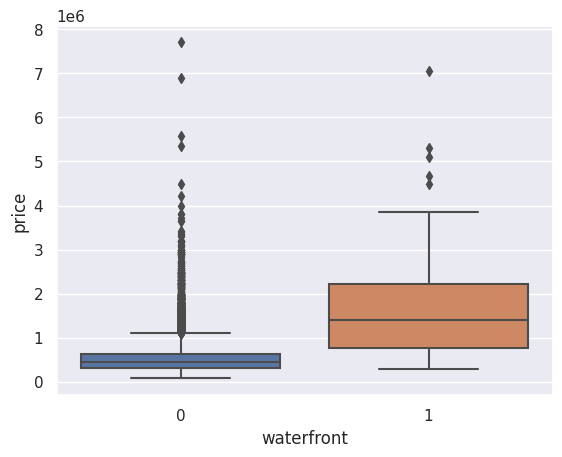

In [72]:
# House on the waterfront tends to be more expensive
sns.boxplot(data=df, x="waterfront", y="price")
plt.show()

In [73]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [74]:
df = df.drop("id", axis=1)

In [76]:
# Datetime is string
df["date"].head(10)

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
5     5/12/2014
6     6/27/2014
7     1/15/2015
8     4/15/2015
9     3/12/2015
Name: date, dtype: object

In [77]:
# Convert to datetime type for calculation if necessary
df["date"] = pd.to_datetime(df["date"])
df["date"].head(10)

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
5   2014-05-12
6   2014-06-27
7   2015-01-15
8   2015-04-15
9   2015-03-12
Name: date, dtype: datetime64[ns]

### Feature Engineering

We are extracting more data from the actual data

In [79]:
df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date.month)

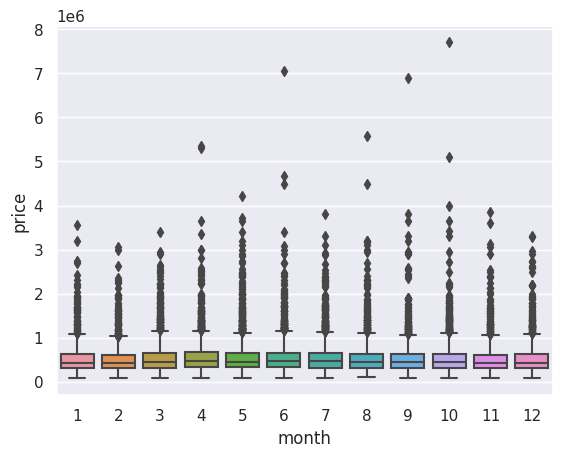

In [80]:
sns.boxplot(data=df, x="month", y="price")
plt.show()

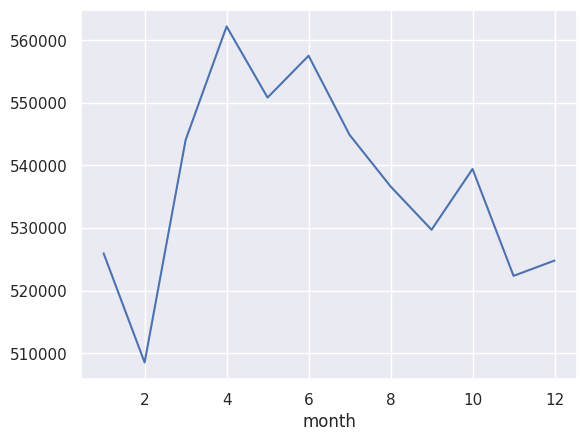

In [84]:
(df.groupby("month")
   .mean(numeric_only=True)["price"]
   .plot())
plt.show()

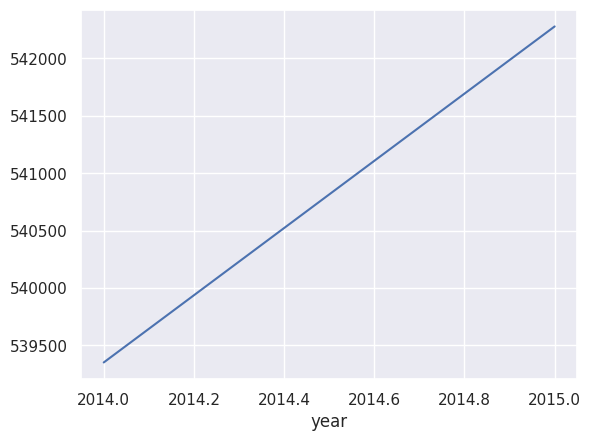

In [85]:
(df.groupby("year")
   .mean(numeric_only=True)["price"]
   .plot())
plt.show()

In [87]:
# We remove the date because we are just using the year and month directly
df = df.drop("date", axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [88]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [89]:
df["zipcode"].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [90]:
# If we have domain expertise with zipcode,
# we could reduce the 70 categories of zipcode, to 4 for example,
# to separate in areas that the model could learn.
# But in this case, we will drop:
df = df.drop("zipcode", axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [91]:
# 0 means that the house was not renovated or it's kind missing
df["yr_renovated"].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [99]:
# Based on the number of zeros,
df["sqft_basement"].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [100]:
X = df.drop("price", axis=1).values
y = df["price"].values

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
# 19 features
X_train.shape

(15117, 19)

In [107]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [108]:
# Not using cross validation yet
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 4s 6ms/step - loss: 430240104448.0000 - val_loss: 418918727680.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 429142343680.0000 - val_loss: 415028314112.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 412897312768.0000 - val_loss: 377528025088.0000
Epoch 4/400
119/119 [==============================] - 1s 4ms/step - loss: 332787744768.0000 - val_loss: 249363316736.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 178843893760.0000 - val_loss: 111962275840.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 102348488704.0000 - val_loss: 94372470784.0000
Epoch 7/400
119/119 [==============================] - 1s 4ms/step - loss: 96796647424.0000 - val_loss: 92823879680.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 95108497408.0000 - val_loss: 91327315968.0000
Epoch 9/400
119/119 [

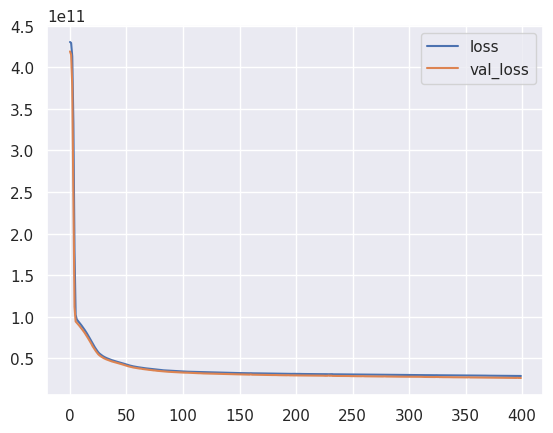

In [109]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

predictions = model.predict(X_test)
predictions

203/203 [==============================] - 1s 3ms/step


array([[418355.4 ],
       [594314.56],
       [567625.56],
       ...,
       [382569.25],
       [568219.2 ],
       [673279.5 ]], dtype=float32)

In [112]:
mean_squared_error(y_test, predictions)

26427496144.93944

In [113]:
mean_absolute_error(y_test, predictions)

100754.73817274306

In [115]:
df["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [116]:
5.402966e+05

540296.6

In [117]:
explained_variance_score(y_test, predictions)

0.8007322574360778

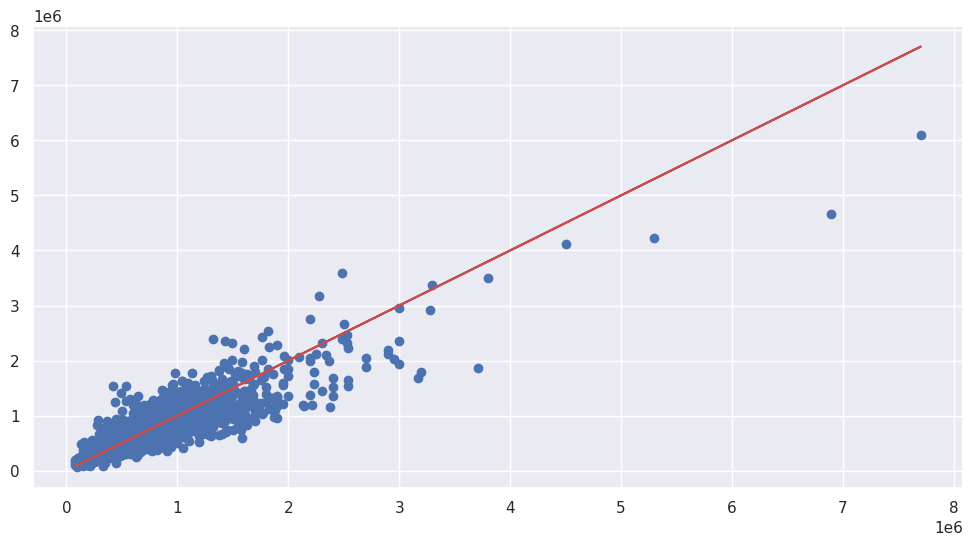

In [119]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')
plt.show()

In [125]:
# We will just simulate the prediction of an "unseen" data
single_house = df.drop("price", axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 19))
model.predict(single_house)

1/1 [==============================] - 0s 48ms/step


array([[278677.3]], dtype=float32)

In [128]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
